In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: WPP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


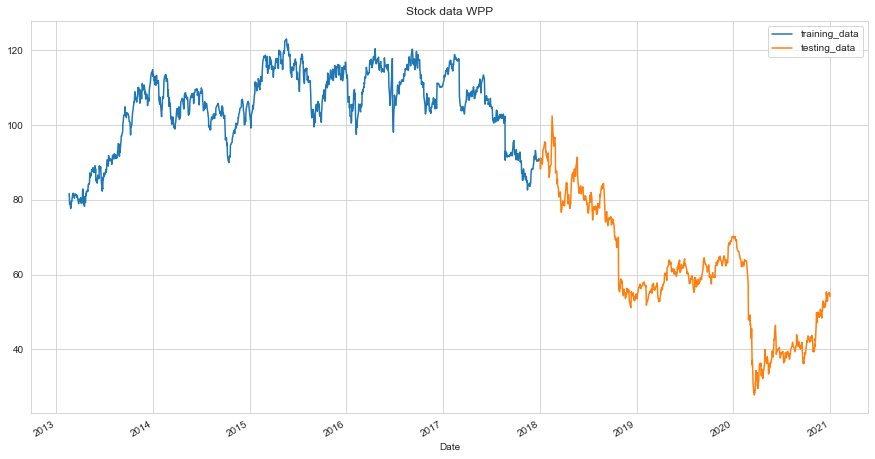

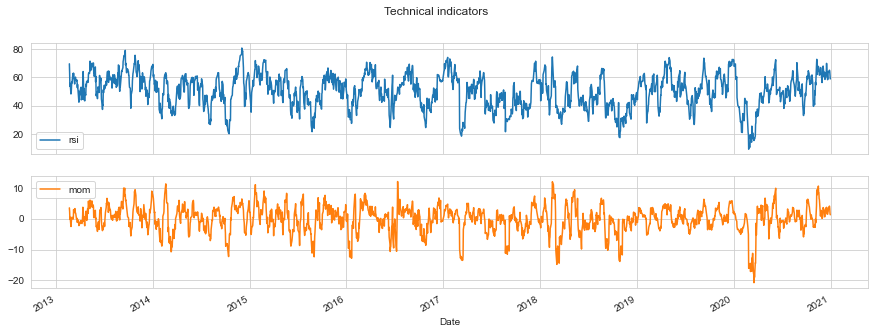

In [2]:
stock_name = 'wpp'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1219.79, duration: 0:00:00.329181
episode: 2/2000, episode end value: 1158.38, duration: 0:00:00.357081
episode: 3/2000, episode end value: 1247.32, duration: 0:00:00.361079
episode: 4/2000, episode end value: 1186.34, duration: 0:00:00.359086
episode: 5/2000, episode end value: 1211.08, duration: 0:00:00.386082
episode: 6/2000, episode end value: 1185.93, duration: 0:00:00.385087
episode: 7/2000, episode end value: 1183.76, duration: 0:00:00.410092
episode: 8/2000, episode end value: 1194.78, duration: 0:00:00.367082
episode: 9/2000, episode end value: 1197.45, duration: 0:00:00.311075
episode: 10/2000, episode end value: 1215.64, duration: 0:00:00.379087
episode: 11/2000, episode end value: 1191.69, duration: 0:00:00.407091
episode: 12/2000, episode end value: 1200.28, duration: 0:00:00.397092
episode: 13/2000, episode end value: 1189.11, duration: 0:00:00.405092
episode: 14/2000, episode end value: 1184.37, duration: 0:00:00.395091
episode: 15/200

episode: 117/2000, episode end value: 1185.37, duration: 0:00:00.421095
episode: 118/2000, episode end value: 1192.14, duration: 0:00:00.407092
episode: 119/2000, episode end value: 1223.94, duration: 0:00:00.429097
episode: 120/2000, episode end value: 1225.91, duration: 0:00:00.402909
episode: 121/2000, episode end value: 1183.80, duration: 0:00:00.384085
episode: 122/2000, episode end value: 1191.22, duration: 0:00:00.371996
episode: 123/2000, episode end value: 1185.70, duration: 0:00:00.415967
episode: 124/2000, episode end value: 1203.83, duration: 0:00:00.490580
episode: 125/2000, episode end value: 1185.71, duration: 0:00:00.479110
episode: 126/2000, episode end value: 1222.18, duration: 0:00:00.390087
episode: 127/2000, episode end value: 1186.53, duration: 0:00:00.417099
episode: 128/2000, episode end value: 1196.15, duration: 0:00:00.435095
episode: 129/2000, episode end value: 1199.25, duration: 0:00:00.368082
episode: 130/2000, episode end value: 1228.48, duration: 0:00:00

episode: 231/2000, episode end value: 1179.65, duration: 0:00:00.502651
episode: 232/2000, episode end value: 1243.77, duration: 0:00:00.459106
episode: 233/2000, episode end value: 1201.68, duration: 0:00:00.415095
episode: 234/2000, episode end value: 1194.59, duration: 0:00:00.447098
episode: 235/2000, episode end value: 1215.11, duration: 0:00:00.417100
episode: 236/2000, episode end value: 1224.42, duration: 0:00:00.412089
episode: 237/2000, episode end value: 1200.44, duration: 0:00:00.438100
episode: 238/2000, episode end value: 1219.15, duration: 0:00:00.432100
episode: 239/2000, episode end value: 1219.52, duration: 0:00:00.417091
episode: 240/2000, episode end value: 1219.07, duration: 0:00:00.402093
episode: 241/2000, episode end value: 1222.11, duration: 0:00:00.428488
episode: 242/2000, episode end value: 1169.57, duration: 0:00:00.405004
episode: 243/2000, episode end value: 1233.21, duration: 0:00:00.390082
episode: 244/2000, episode end value: 1212.08, duration: 0:00:00

episode: 345/2000, episode end value: 1196.28, duration: 0:00:00.418097
episode: 346/2000, episode end value: 1267.67, duration: 0:00:00.386086
episode: 347/2000, episode end value: 1215.02, duration: 0:00:00.464103
episode: 348/2000, episode end value: 1254.86, duration: 0:00:00.363087
episode: 349/2000, episode end value: 1210.66, duration: 0:00:00.409091
episode: 350/2000, episode end value: 1225.53, duration: 0:00:00.512116
episode: 351/2000, episode end value: 1257.16, duration: 0:00:00.526117
episode: 352/2000, episode end value: 1209.08, duration: 0:00:00.496110
episode: 353/2000, episode end value: 1207.03, duration: 0:00:00.503113
episode: 354/2000, episode end value: 1210.64, duration: 0:00:00.422095
episode: 355/2000, episode end value: 1226.65, duration: 0:00:00.424095
episode: 356/2000, episode end value: 1197.05, duration: 0:00:00.424095
episode: 357/2000, episode end value: 1223.22, duration: 0:00:00.414096
episode: 358/2000, episode end value: 1216.90, duration: 0:00:00

episode: 459/2000, episode end value: 1205.82, duration: 0:00:00.388088
episode: 460/2000, episode end value: 1199.42, duration: 0:00:00.450102
episode: 461/2000, episode end value: 1196.19, duration: 0:00:00.428097
episode: 462/2000, episode end value: 1226.01, duration: 0:00:00.397092
episode: 463/2000, episode end value: 1188.90, duration: 0:00:00.518115
episode: 464/2000, episode end value: 1194.03, duration: 0:00:00.474106
episode: 465/2000, episode end value: 1196.86, duration: 0:00:00.455104
episode: 466/2000, episode end value: 1252.79, duration: 0:00:00.432093
episode: 467/2000, episode end value: 1197.98, duration: 0:00:00.396091
episode: 468/2000, episode end value: 1197.17, duration: 0:00:00.412099
episode: 469/2000, episode end value: 1222.28, duration: 0:00:00.459102
episode: 470/2000, episode end value: 1159.96, duration: 0:00:00.501112
episode: 471/2000, episode end value: 1205.69, duration: 0:00:00.507114
episode: 472/2000, episode end value: 1249.28, duration: 0:00:00

episode: 573/2000, episode end value: 1189.43, duration: 0:00:00.400093
episode: 574/2000, episode end value: 1196.53, duration: 0:00:00.401085
episode: 575/2000, episode end value: 1227.36, duration: 0:00:00.440102
episode: 576/2000, episode end value: 1217.81, duration: 0:00:00.384089
episode: 577/2000, episode end value: 1236.47, duration: 0:00:00.418092
episode: 578/2000, episode end value: 1219.60, duration: 0:00:00.367076
episode: 579/2000, episode end value: 1208.14, duration: 0:00:00.399090
episode: 580/2000, episode end value: 1205.52, duration: 0:00:00.429095
episode: 581/2000, episode end value: 1188.75, duration: 0:00:00.415094
episode: 582/2000, episode end value: 1184.95, duration: 0:00:00.523112
episode: 583/2000, episode end value: 1194.35, duration: 0:00:00.454104
episode: 584/2000, episode end value: 1191.17, duration: 0:00:00.378080
episode: 585/2000, episode end value: 1186.59, duration: 0:00:00.475111
episode: 586/2000, episode end value: 1201.37, duration: 0:00:00

episode: 687/2000, episode end value: 1204.65, duration: 0:00:00.347078
episode: 688/2000, episode end value: 1196.50, duration: 0:00:00.361078
episode: 689/2000, episode end value: 1214.89, duration: 0:00:00.372087
episode: 690/2000, episode end value: 1181.13, duration: 0:00:00.394087
episode: 691/2000, episode end value: 1228.58, duration: 0:00:00.351083
episode: 692/2000, episode end value: 1247.18, duration: 0:00:00.466104
episode: 693/2000, episode end value: 1238.91, duration: 0:00:00.397090
episode: 694/2000, episode end value: 1206.25, duration: 0:00:00.372085
episode: 695/2000, episode end value: 1214.52, duration: 0:00:00.418092
episode: 696/2000, episode end value: 1204.14, duration: 0:00:00.392091
episode: 697/2000, episode end value: 1210.90, duration: 0:00:00.410095
episode: 698/2000, episode end value: 1215.97, duration: 0:00:00.385086
episode: 699/2000, episode end value: 1210.20, duration: 0:00:00.403093
episode: 700/2000, episode end value: 1217.84, duration: 0:00:00

episode: 801/2000, episode end value: 1209.88, duration: 0:00:00.335076
episode: 802/2000, episode end value: 1202.88, duration: 0:00:00.350075
episode: 803/2000, episode end value: 1204.09, duration: 0:00:00.351083
episode: 804/2000, episode end value: 1242.06, duration: 0:00:00.333072
episode: 805/2000, episode end value: 1218.35, duration: 0:00:00.372087
episode: 806/2000, episode end value: 1209.61, duration: 0:00:00.341075
episode: 807/2000, episode end value: 1225.22, duration: 0:00:00.351077
episode: 808/2000, episode end value: 1176.15, duration: 0:00:00.324076
episode: 809/2000, episode end value: 1232.69, duration: 0:00:00.337078
episode: 810/2000, episode end value: 1206.78, duration: 0:00:00.353086
episode: 811/2000, episode end value: 1204.97, duration: 0:00:00.331071
episode: 812/2000, episode end value: 1153.92, duration: 0:00:00.336078
episode: 813/2000, episode end value: 1191.09, duration: 0:00:00.350078
episode: 814/2000, episode end value: 1221.78, duration: 0:00:00

episode: 915/2000, episode end value: 1233.46, duration: 0:00:00.508118
episode: 916/2000, episode end value: 1193.60, duration: 0:00:00.464104
episode: 917/2000, episode end value: 1193.01, duration: 0:00:00.394152
episode: 918/2000, episode end value: 1220.76, duration: 0:00:00.437148
episode: 919/2000, episode end value: 1191.87, duration: 0:00:00.379459
episode: 920/2000, episode end value: 1196.12, duration: 0:00:00.430960
episode: 921/2000, episode end value: 1196.18, duration: 0:00:00.460522
episode: 922/2000, episode end value: 1191.61, duration: 0:00:00.442098
episode: 923/2000, episode end value: 1205.14, duration: 0:00:00.431095
episode: 924/2000, episode end value: 1213.19, duration: 0:00:00.413095
episode: 925/2000, episode end value: 1196.98, duration: 0:00:00.461100
episode: 926/2000, episode end value: 1223.13, duration: 0:00:00.441099
episode: 927/2000, episode end value: 1197.41, duration: 0:00:00.435099
episode: 928/2000, episode end value: 1239.56, duration: 0:00:00

episode: 1029/2000, episode end value: 1187.93, duration: 0:00:00.317077
episode: 1030/2000, episode end value: 1170.88, duration: 0:00:00.387083
episode: 1031/2000, episode end value: 1218.01, duration: 0:00:00.324072
episode: 1032/2000, episode end value: 1218.21, duration: 0:00:00.368084
episode: 1033/2000, episode end value: 1191.16, duration: 0:00:00.318075
episode: 1034/2000, episode end value: 1221.77, duration: 0:00:00.410092
episode: 1035/2000, episode end value: 1226.20, duration: 0:00:00.347077
episode: 1036/2000, episode end value: 1183.71, duration: 0:00:00.368081
episode: 1037/2000, episode end value: 1189.00, duration: 0:00:00.365084
episode: 1038/2000, episode end value: 1199.86, duration: 0:00:00.322069
episode: 1039/2000, episode end value: 1200.63, duration: 0:00:00.336080
episode: 1040/2000, episode end value: 1214.74, duration: 0:00:00.349078
episode: 1041/2000, episode end value: 1204.82, duration: 0:00:00.402088
episode: 1042/2000, episode end value: 1190.92, dur

episode: 1142/2000, episode end value: 1185.94, duration: 0:00:00.335082
episode: 1143/2000, episode end value: 1189.91, duration: 0:00:00.330072
episode: 1144/2000, episode end value: 1203.55, duration: 0:00:00.330076
episode: 1145/2000, episode end value: 1193.96, duration: 0:00:00.323072
episode: 1146/2000, episode end value: 1190.62, duration: 0:00:00.327072
episode: 1147/2000, episode end value: 1224.35, duration: 0:00:00.303067
episode: 1148/2000, episode end value: 1226.55, duration: 0:00:00.315073
episode: 1149/2000, episode end value: 1238.68, duration: 0:00:00.313074
episode: 1150/2000, episode end value: 1192.14, duration: 0:00:00.346075
episode: 1151/2000, episode end value: 1206.13, duration: 0:00:00.307072
episode: 1152/2000, episode end value: 1195.57, duration: 0:00:00.318074
episode: 1153/2000, episode end value: 1243.26, duration: 0:00:00.310068
episode: 1154/2000, episode end value: 1191.76, duration: 0:00:00.339074
episode: 1155/2000, episode end value: 1203.66, dur

episode: 1255/2000, episode end value: 1218.13, duration: 0:00:00.315070
episode: 1256/2000, episode end value: 1182.77, duration: 0:00:00.324075
episode: 1257/2000, episode end value: 1230.75, duration: 0:00:00.338077
episode: 1258/2000, episode end value: 1236.47, duration: 0:00:00.357084
episode: 1259/2000, episode end value: 1196.20, duration: 0:00:00.307067
episode: 1260/2000, episode end value: 1245.58, duration: 0:00:00.306069
episode: 1261/2000, episode end value: 1189.81, duration: 0:00:00.301071
episode: 1262/2000, episode end value: 1186.82, duration: 0:00:00.303066
episode: 1263/2000, episode end value: 1209.94, duration: 0:00:00.299069
episode: 1264/2000, episode end value: 1207.57, duration: 0:00:00.355081
episode: 1265/2000, episode end value: 1190.11, duration: 0:00:00.283544
episode: 1266/2000, episode end value: 1243.44, duration: 0:00:00.281064
episode: 1267/2000, episode end value: 1197.89, duration: 0:00:00.285066
episode: 1268/2000, episode end value: 1222.38, dur

episode: 1368/2000, episode end value: 1191.84, duration: 0:00:00.306072
episode: 1369/2000, episode end value: 1184.25, duration: 0:00:00.296070
episode: 1370/2000, episode end value: 1188.23, duration: 0:00:00.318071
episode: 1371/2000, episode end value: 1183.97, duration: 0:00:00.286065
episode: 1372/2000, episode end value: 1183.72, duration: 0:00:00.280061
episode: 1373/2000, episode end value: 1190.57, duration: 0:00:00.305069
episode: 1374/2000, episode end value: 1183.46, duration: 0:00:00.306070
episode: 1375/2000, episode end value: 1189.94, duration: 0:00:00.341076
episode: 1376/2000, episode end value: 1227.34, duration: 0:00:00.311067
episode: 1377/2000, episode end value: 1227.49, duration: 0:00:00.322072
episode: 1378/2000, episode end value: 1213.29, duration: 0:00:00.293066
episode: 1379/2000, episode end value: 1216.97, duration: 0:00:00.291066
episode: 1380/2000, episode end value: 1146.31, duration: 0:00:00.301068
episode: 1381/2000, episode end value: 1187.87, dur

episode: 1481/2000, episode end value: 1201.38, duration: 0:00:00.332073
episode: 1482/2000, episode end value: 1222.70, duration: 0:00:00.308068
episode: 1483/2000, episode end value: 1196.40, duration: 0:00:00.325072
episode: 1484/2000, episode end value: 1168.67, duration: 0:00:00.337080
episode: 1485/2000, episode end value: 1192.00, duration: 0:00:00.347076
episode: 1486/2000, episode end value: 1198.68, duration: 0:00:00.333078
episode: 1487/2000, episode end value: 1185.35, duration: 0:00:00.343076
episode: 1488/2000, episode end value: 1202.29, duration: 0:00:00.321076
episode: 1489/2000, episode end value: 1186.59, duration: 0:00:00.367086
episode: 1490/2000, episode end value: 1211.69, duration: 0:00:00.325071
episode: 1491/2000, episode end value: 1146.98, duration: 0:00:00.361083
episode: 1492/2000, episode end value: 1185.27, duration: 0:00:00.332076
episode: 1493/2000, episode end value: 1188.80, duration: 0:00:00.335073
episode: 1494/2000, episode end value: 1210.56, dur

episode: 1594/2000, episode end value: 1225.86, duration: 0:00:00.364079
episode: 1595/2000, episode end value: 1190.05, duration: 0:00:00.333073
episode: 1596/2000, episode end value: 1207.30, duration: 0:00:00.324075
episode: 1597/2000, episode end value: 1220.48, duration: 0:00:00.380085
episode: 1598/2000, episode end value: 1198.23, duration: 0:00:00.343078
episode: 1599/2000, episode end value: 1224.89, duration: 0:00:00.350076
episode: 1600/2000, episode end value: 1224.65, duration: 0:00:00.301067
episode: 1601/2000, episode end value: 1156.00, duration: 0:00:00.314070
episode: 1602/2000, episode end value: 1201.41, duration: 0:00:00.285065
episode: 1603/2000, episode end value: 1153.21, duration: 0:00:00.324074
episode: 1604/2000, episode end value: 1191.20, duration: 0:00:00.317074
episode: 1605/2000, episode end value: 1195.69, duration: 0:00:00.330074
episode: 1606/2000, episode end value: 1194.37, duration: 0:00:00.308074
episode: 1607/2000, episode end value: 1186.70, dur

episode: 1707/2000, episode end value: 1207.72, duration: 0:00:00.351066
episode: 1708/2000, episode end value: 1212.36, duration: 0:00:00.302065
episode: 1709/2000, episode end value: 1192.63, duration: 0:00:00.334077
episode: 1710/2000, episode end value: 1240.36, duration: 0:00:00.299066
episode: 1711/2000, episode end value: 1203.69, duration: 0:00:00.310070
episode: 1712/2000, episode end value: 1200.48, duration: 0:00:00.300065
episode: 1713/2000, episode end value: 1236.54, duration: 0:00:00.310068
episode: 1714/2000, episode end value: 1207.13, duration: 0:00:00.322088
episode: 1715/2000, episode end value: 1237.62, duration: 0:00:00.285057
episode: 1716/2000, episode end value: 1196.40, duration: 0:00:00.295063
episode: 1717/2000, episode end value: 1188.58, duration: 0:00:00.304066
episode: 1718/2000, episode end value: 1201.55, duration: 0:00:00.332076
episode: 1719/2000, episode end value: 1246.80, duration: 0:00:00.307068
episode: 1720/2000, episode end value: 1207.47, dur

episode: 1820/2000, episode end value: 1218.94, duration: 0:00:00.283063
episode: 1821/2000, episode end value: 1195.90, duration: 0:00:00.292064
episode: 1822/2000, episode end value: 1226.28, duration: 0:00:00.283068
episode: 1823/2000, episode end value: 1203.43, duration: 0:00:00.295063
episode: 1824/2000, episode end value: 1207.48, duration: 0:00:00.284064
episode: 1825/2000, episode end value: 1208.13, duration: 0:00:00.280061
episode: 1826/2000, episode end value: 1228.77, duration: 0:00:00.317072
episode: 1827/2000, episode end value: 1211.63, duration: 0:00:00.322074
episode: 1828/2000, episode end value: 1199.16, duration: 0:00:00.314078
episode: 1829/2000, episode end value: 1236.30, duration: 0:00:00.292064
episode: 1830/2000, episode end value: 1193.36, duration: 0:00:00.276062
episode: 1831/2000, episode end value: 1217.33, duration: 0:00:00.276063
episode: 1832/2000, episode end value: 1219.86, duration: 0:00:00.258056
episode: 1833/2000, episode end value: 1215.57, dur

episode: 1933/2000, episode end value: 1193.50, duration: 0:00:00.237066
episode: 1934/2000, episode end value: 1186.22, duration: 0:00:00.225042
episode: 1935/2000, episode end value: 1212.78, duration: 0:00:00.215048
episode: 1936/2000, episode end value: 1220.62, duration: 0:00:00.224051
episode: 1937/2000, episode end value: 1196.58, duration: 0:00:00.225051
episode: 1938/2000, episode end value: 1235.70, duration: 0:00:00.223058
episode: 1939/2000, episode end value: 1210.78, duration: 0:00:00.224041
episode: 1940/2000, episode end value: 1237.21, duration: 0:00:00.215049
episode: 1941/2000, episode end value: 1197.04, duration: 0:00:00.222055
episode: 1942/2000, episode end value: 1194.55, duration: 0:00:00.225051
episode: 1943/2000, episode end value: 1212.09, duration: 0:00:00.223050
episode: 1944/2000, episode end value: 1196.50, duration: 0:00:00.214536
episode: 1945/2000, episode end value: 1210.41, duration: 0:00:00.208046
episode: 1946/2000, episode end value: 1191.23, dur

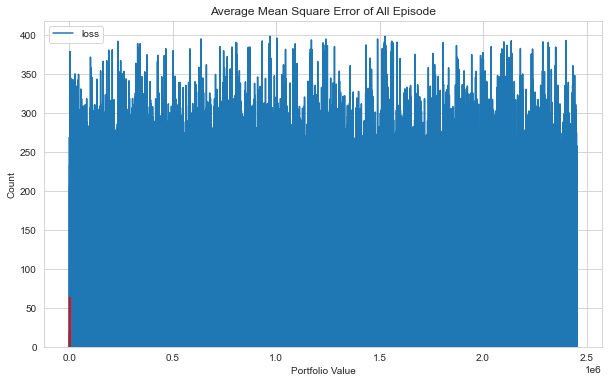

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

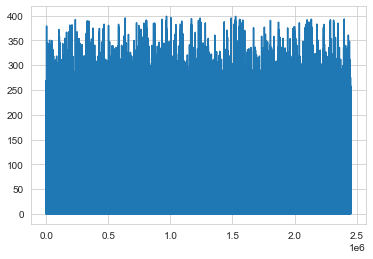

In [5]:
plt.plot(agent.model.losses)

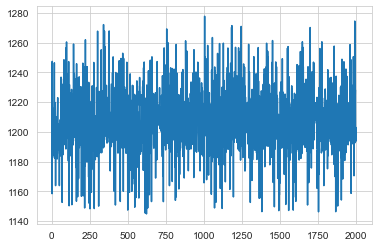

In [6]:
plt.plot(portfolio_value)

episode end value: 930.87, duration: 0:00:00.051005
Sell: 2 times, Buy: 4 times


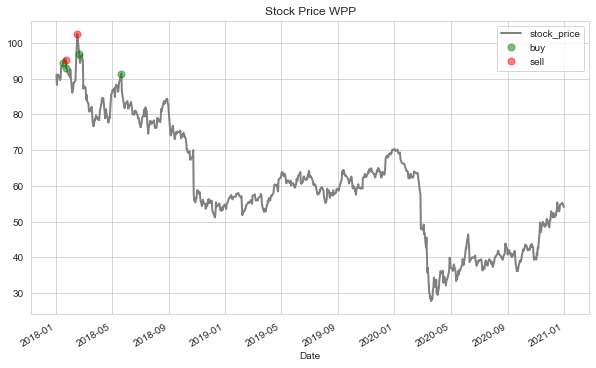

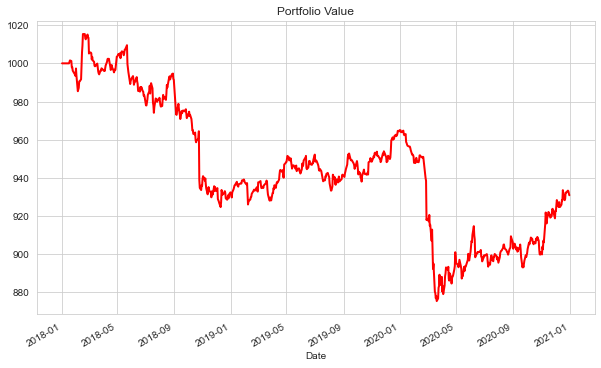

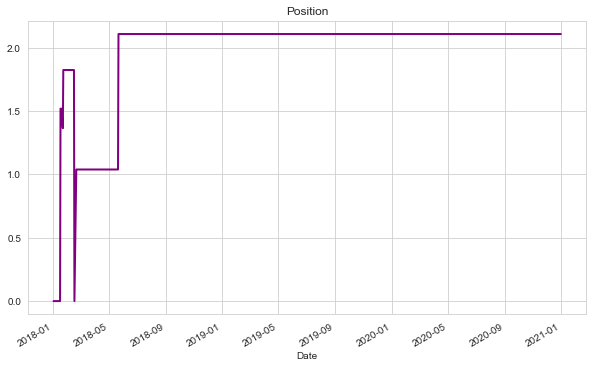

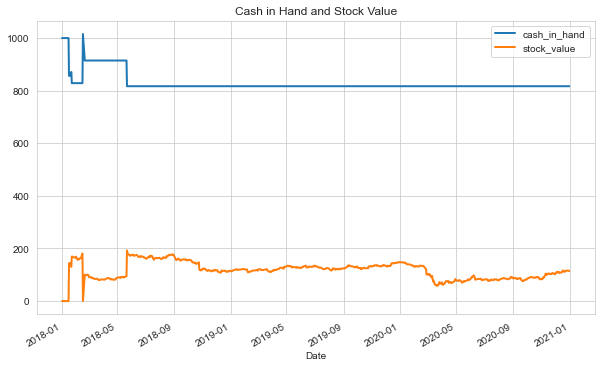

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: WPP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -2.36 %
Volatility: 0.0464
shape ratio: -0.7457
Maximun drawdown: -13.78 %
Calmar ratio: -0.1712
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -15.95 %
Volatility (benchmark): 0.4142
shape ratio: -0.4117
Maximun drawdown: -72.92 %
Calmar ratio (benchmark): -0.2188


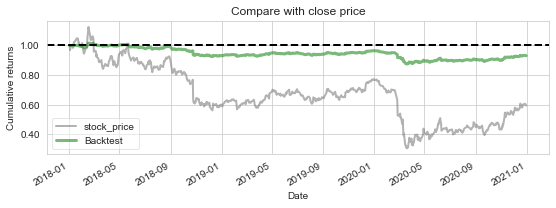

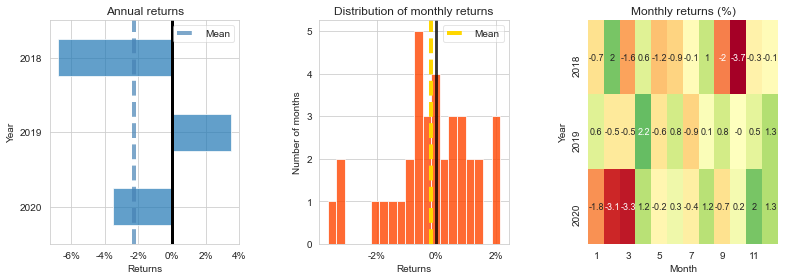

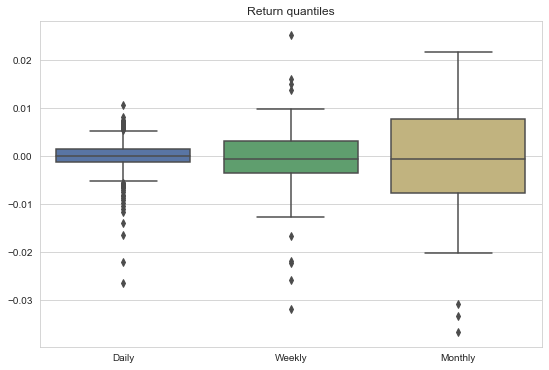

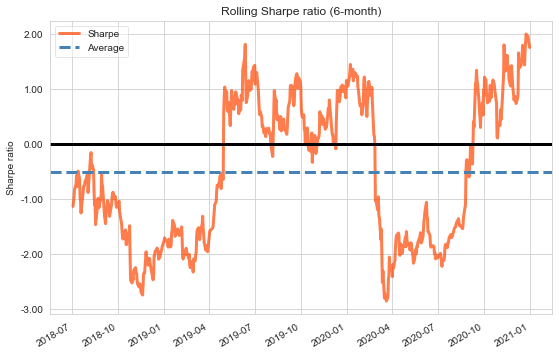

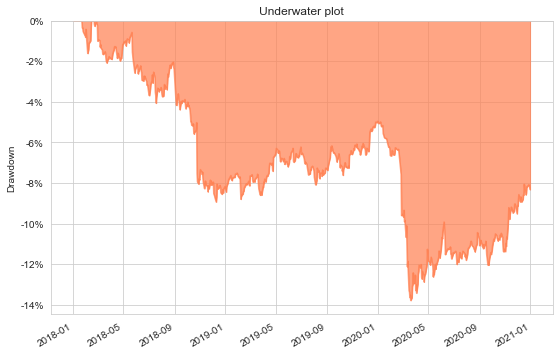

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')